#### NRT Lectures - Statistical Modeling

# Bayesian Hierarchical Model

### Rat Tumor Example

In [1]:
import math
import random
import numpy as np
import pandas as pd
# import graphviz
# from pymc3 import model_to_graphviz
import pymc3 as pm
from pymc3 import Model, sample, Beta, Binomial, Exponential, Uniform, summary, plot_posterior, model_to_graphviz, Deterministic
import matplotlib.pyplot as plt
# import os
# os.environ["PATH"] += os.pathsep + 'C:\Program Files\Python37\Lib\site-packages\graphviz\dot.py'

In [2]:
d =  pd.read_table("rattumor.txt", sep = " ")
d = d.iloc[:,:2]
d

y   N
0    0  20
1    0  20
2    0  20
3    0  20
4    0  20
..  ..  ..
66  16  52
67  15  46
68  15  47
69   9  24
70   4  14

[71 rows x 2 columns]

In [3]:
d.describe()

y          N
count  71.000000  71.000000
mean    3.760563  24.492958
std     3.811504  10.973830
min     0.000000  10.000000
25%     1.000000  19.000000
50%     3.000000  20.000000
75%     5.000000  22.500000
max    16.000000  52.000000

A naive estimate of $\theta_j$ is $\hat{\theta}_j = ùë¶_{ùëó}/ùëõ_{j}$

Histogram of $\hat{\theta}_j$

<function matplotlib.pyplot.show(close=None, block=None)>

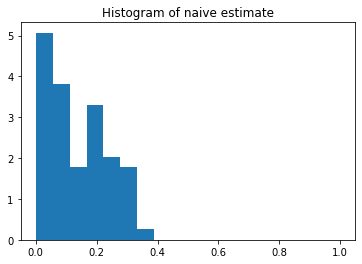

In [4]:
plt.hist(d.y/d.N, range = (0,1), bins = 18, density=True)
plt.title("Histogram of naive estimate")
plt.show

In [5]:
with Model() as model1:

    # Priors
    alpha = Exponential('alpha', 0.001)
    beta = Exponential('beta', 0.001)

    theta = Beta('theta', alpha=alpha, beta=beta, shape=71)

    # Data likelihood
    y_like = Binomial('y_like', n=d.N, p=theta, observed=d.y)

In [6]:
random.seed(100)
with model1:
    trace1 = sample(100, tune=100)

/tmp/ipykernel_9952/1044724547.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace1 = sample(100, tune=100)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, beta, alpha]


Sampling 2 chains for 100 tune and 100 draw iterations (200 + 200 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.9763936443680605, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.920349624272922, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 10% for some parameters.


In [7]:
summary(trace1)

/home/ooblack/miniconda3/envs/viz/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha       3.119  1.399   1.164    5.611      0.368    0.272      17.0   
beta       18.891  7.971   6.632   34.316      1.771    1.271      22.0   
theta[0]    0.075  0.045   0.001    0.163      0.005    0.004      58.0   
theta[1]    0.071  0.038   0.003    0.135      0.005    0.003      56.0   
theta[2]    0.069  0.045   0.004    0.150      0.004    0.003     119.0   
...           ...    ...     ...      ...        ...      ...       ...   
theta[66]   0.259  0.056   0.160    0.357      0.003    0.002     349.0   
theta[67]   0.274  0.058   0.170    0.384      0.003    0.003     419.0   
theta[68]   0.265  0.057   0.151    0.371      0.003    0.003     304.0   
theta[69]   0.267  0.079   0.151    0.444      0.005    0.004     288.0   
theta[70]   0.201  0.066   0.094    0.324      0.003    0.002     285.0   

           ess_tail  r_hat  
alpha          21.0   1.09  
beta           33.0   1.07  
theta[0]       63.0   1.03  
theta[1]       73.0   1.03  
theta[2]       87.0   1.01  
...             ...    ...  
theta[66]     121.0   1.01  
theta[67]     157.0   1.05  
theta[68]     141.0   1.02  
theta[69]     118.0   1.08  
theta[70]     198.0   1.00  

[73 rows x 9 columns]

<AxesSubplot:title={'center':'x'}>

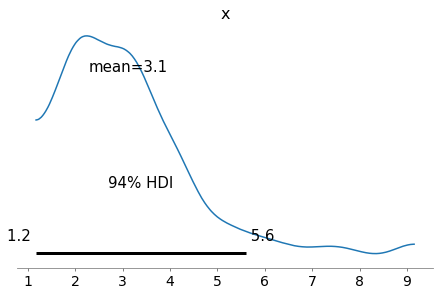

In [8]:
plot_posterior(trace1['alpha'])

<AxesSubplot:title={'center':'x'}>

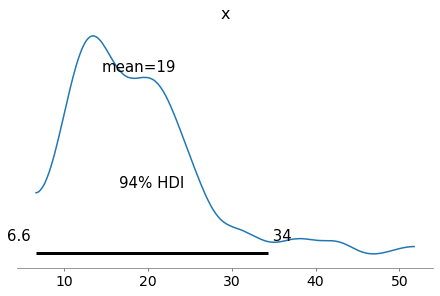

In [9]:
plot_posterior(trace1['beta'])

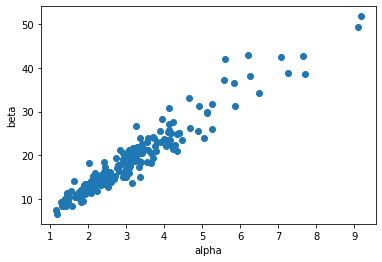

In [10]:
alpha = trace1.get_values(varname='alpha')
beta = trace1.get_values(varname='beta')
plt.scatter(alpha, beta)
plt.xlabel('alpha')
plt.ylabel('beta')
plt.show()

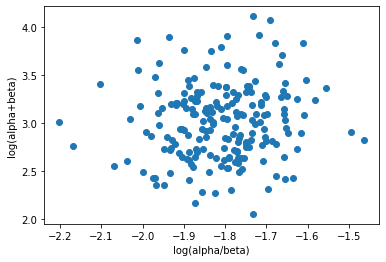

In [11]:
plt.scatter(np.log(alpha/beta), np.log(alpha+beta))
plt.xlabel('log(alpha/beta)')
plt.ylabel('log(alpha+beta)')
plt.show()

### Try another prior

In [12]:
with Model() as model2:

    phi1 = Uniform('phi1', lower=0, upper=1)
    phi2 = Uniform('phi2', lower=0, upper=1000)

    alpha = Deterministic('alpha', phi1 / (phi2**2))
    beta = Deterministic('beta', (1-phi1) / phi2**2)

    theta = Beta('theta', alpha=alpha, beta=beta, shape=71)

    # Data likelihood
    y_like = Binomial('y_like', n=d.N, p=theta, observed=d.y)

In [13]:
random.seed(100)
with model2:
    trace2 = sample(100, tune=100)

/tmp/ipykernel_9952/2992495953.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace2 = sample(100, tune=100)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, phi2, phi1]


Sampling 2 chains for 100 tune and 100 draw iterations (200 + 200 draws total) took 5 seconds.
The acceptance probability does not match the target. It is 0.9346941703130048, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9318999435860623, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The number of effective samples is smaller than 25% for some parameters.


In [14]:
summary(trace2)

/home/ooblack/miniconda3/envs/viz/lib/python3.10/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
phi1        0.144  0.013   0.119    0.167      0.001    0.001     182.0   
phi2        0.252  0.038   0.184    0.320      0.006    0.004      43.0   
alpha       2.414  0.730   1.190    3.703      0.120    0.086      35.0   
beta       14.438  4.277   6.428   21.429      0.605    0.430      50.0   
theta[0]    0.061  0.041   0.006    0.148      0.003    0.002     159.0   
...           ...    ...     ...      ...        ...      ...       ...   
theta[66]   0.266  0.059   0.166    0.363      0.003    0.002     442.0   
theta[67]   0.278  0.055   0.171    0.381      0.003    0.002     460.0   
theta[68]   0.275  0.061   0.175    0.381      0.003    0.002     384.0   
theta[69]   0.282  0.065   0.179    0.411      0.003    0.002     371.0   
theta[70]   0.215  0.074   0.081    0.345      0.004    0.003     296.0   

           ess_tail  r_hat  
phi1          119.0   1.00  
phi2          217.0   1.04  
alpha         149.0   1.05  
beta          217.0   1.04  
theta[0]      132.0   1.00  
...             ...    ...  
theta[66]     138.0   1.00  
theta[67]     162.0   1.02  
theta[68]     230.0   0.99  
theta[69]     124.0   1.00  
theta[70]     181.0   1.00  

[75 rows x 9 columns]

<AxesSubplot:title={'center':'x'}>

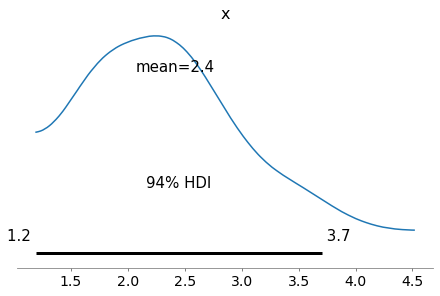

In [15]:
plot_posterior(trace2['alpha'])

<AxesSubplot:title={'center':'x'}>

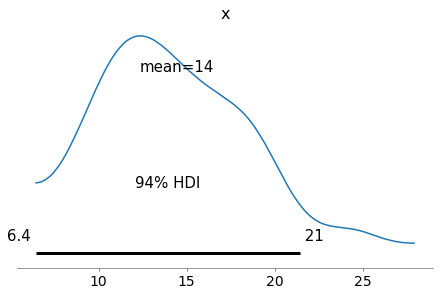

In [16]:
plot_posterior(trace2['beta'])

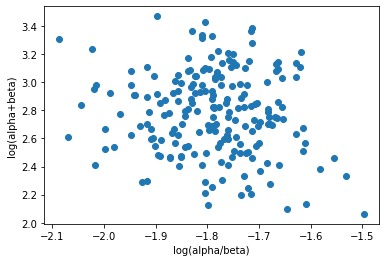

In [17]:
alpha2 = trace2.get_values(varname='alpha')
beta2 = trace2.get_values(varname='beta')
plt.scatter(np.log(alpha2/beta2), np.log(alpha2+beta2))
plt.xlabel('log(alpha/beta)')
plt.ylabel('log(alpha+beta)')
plt.show()